In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Generate numbers between -1 and 1

In [27]:
X_values = np.linspace(-1, 1, 101)
print(X_values)

[-1.   -0.98 -0.96 -0.94 -0.92 -0.9  -0.88 -0.86 -0.84 -0.82 -0.8  -0.78
 -0.76 -0.74 -0.72 -0.7  -0.68 -0.66 -0.64 -0.62 -0.6  -0.58 -0.56 -0.54
 -0.52 -0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34 -0.32 -0.3
 -0.28 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06
 -0.04 -0.02  0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18
  0.2   0.22  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42
  0.44  0.46  0.48  0.5   0.52  0.54  0.56  0.58  0.6   0.62  0.64  0.66
  0.68  0.7   0.72  0.74  0.76  0.78  0.8   0.82  0.84  0.86  0.88  0.9
  0.92  0.94  0.96  0.98  1.  ]


In [28]:
X_values.shape

(101,)

Take Y values approximately linear with X 

In [29]:
Y_values = 2 * X_values + np.random.randn(*X_values.shape) * 0.20

In [30]:
Y_values.shape

(101,)

Plot X and Y

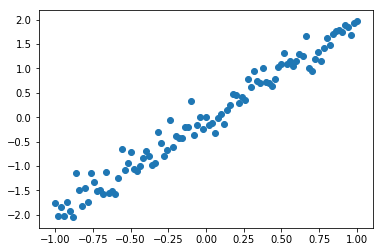

In [31]:
plt.scatter(X_values, Y_values)
plt.show()

Now we are creating the variables(X, Y) to hold the values in x and y axes.<br>
Or we can say we are inserting a placeholder for a tensor that is always fed. To fed or to assign values we have to use
 "feed_dict" from Session.run() <br>
__Our Linear Regression Model is y = W*x__ (Think of this as y = mx + c where c = 0)<br>
        * W is the weight value which we have to find by our model (by training it) so that we can get a linear line.

* Our main focus is to find a hypothesis which has the minimum cost (that means our predicted value should not deviate much from the actual value).<br>
Gradient Descent is used to find such hypothesis (automatically) which has the minimum cost. We are passing the "learning rate" (in this case 0.01) to GradientDescentOptimizer for the steps it should take to reach global/local minima.


In [32]:
X = tf.placeholder("float")  #float is the type of elements in the tensor to be fed.
Y = tf.placeholder("float")

def model(X, w):
    return tf.multiply(X, w)   #our LR model w*x

w = tf.Variable(0.0, name = "weights")
y_model = model(X, w)

cost = tf.square(Y - y_model)

train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
                

Here we are using one example at a time to update our weight parameter. This is called Stochastic Gradient Descent.<br>
__Stochastic Gradient Descent :__ Use one example in each iteration.<br>
__Batch Gradient Descent :__ Use all the eamples in each iteration.<br>
__Mini-Batch Gradient Descent :__ Use b examples in each iteration. ("b" is the mini-batch size) For eg: if total number of training examples are 100 and if we assign b = 20. Then for each set of 20 examples there will be one update of the parameter.<br>

1.9522771


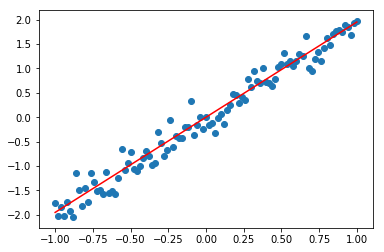

In [33]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()  # Here we are initializing the "variables" before using them. In this case "w"
    
    for i in range (100):  # Run 100 epochs
        for (x,y) in zip(X_values, Y_values):   # Taking each points one-by-one and run gradient descent and update the parameter i.e "w"
            sess.run(train_op, feed_dict={X:x, Y:y})
            
    print(sess.run(w))
    plt.scatter(X_values,Y_values)
    plt.plot(X_values, X_values*sess.run(w), color="red")
    


The weight value (w) we obtained is 1.9196501.<br>
And the red line is the linear line we got by training our model.<br>
We can verify this by doing on paper. Our equation was y = mx + c. (Here m = w, c = 0, x = X_values)